# U23AI118

# Image Compression with SVD

## Objective
The objective of this lab is to design and implement a basic image compression technique using 
Singular Value Decomposition (SVD). Learn how the data compression can be 
done using the simple linear algebra concept of SVD.

## TasksPerformed
● Downloaded the images and converted it into grayscale

● Applied SVD function on all the three images 

● Analyzed and Visualized results by taking different singular values (n: 1,5,10,20,40,50) for each image 

● Found a compression ratio for each case

● Used cats and dogs dataset from https://zenodo.org/records/5226945 and applied SVD on them.

● Compared results with PCA providing proper visualization.

## About SVD
The V matrix gives us important directions among our features, Σ tells us the strength or importance of each of those directions, and U tells us how our individual data points relate to those directions.
Σ (our diagonal matrix) must have the same dimensions as our data matrix.
Data matrix = UxΣxV.T

## 1) Download the images

We will download the images from

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTJHcWBQijdck5GD1-y-nSOFIEUvbrH7SP7Dg&s

https://www.researchgate.net/profile/Harshan-Jagadeesh/publication/271589135/figure/fig1/AS:295174543560710@1447386503276/The-Cameraman-Image-transmitted-from-Alice-to-Bob-This-image-is-extensively-used-as-a.png

https://www.researchgate.net/profile/Erol-Kurt/publication/313951756/figure/fig4/AS:691783109464064@1541945354189/Plain-Baboon-Image-Figure-7-Ciphered-Baboon-Image.ppm

In [9]:
from pathlib import Path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Convert in Grayscale

In [10]:
def load_grayscale(path):
    """Loads image and return a 2D numpy array (dtype=float64) with values in [0,255]. Meaning grayscale image"""
    img = Image.open(path).convert('L')
    arr = np.asarray(img, dtype=np.float64)
    return arr

## Implementation of SVD

In [11]:
def svd(A):
    """Compute full SVD of A (m x n)
    Returns U (m x r), S (r,), Vt (r x n) where r = min(m,n) and S sorted descending.
    """
    A = np.asarray(A, dtype=np.float64)
    m, n = A.shape
    # Compute covariance matrix. We can also use A.T @ A to compute.
    AAT = A @ A.T
    # Since A A.T will be symetric functioh eigh can be used
    eigvals_u, eigvecs_u = np.linalg.eigh(AAT)
    # sort in descending order
    idx = np.argsort(eigvals_u)[::-1]
    eigvals_u = eigvals_u[idx]
    U = eigvecs_u[:, idx]
    # singular values computed
    singular_vals = np.sqrt(np.clip(eigvals_u, a_min=0, a_max=None))

    r = min(m, n)
    singular_vals = singular_vals[:r]
    U = U[:, :r]

    # compute V using: v_i = (A^T u_i) / s_i
    V = np.zeros((n, r), dtype=np.float64)
    for i in range(r):
        s = singular_vals[i]
        if s > 1e-12:
            V[:, i] = (A.T @ U[:, i]) / s
        else:
            V[:, i] = 0.0

    Vt = V.T
    return U, singular_vals, Vt


def reconstruct_from_svd(U, S, Vt, k):
    """Reconstruct the matrix using the top-k singular values/vectors."""
    k = min(k, S.size)
    if k == 0:
        return np.zeros((U.shape[0], Vt.shape[1]), dtype=np.float64)
    Uk = U[:, :k]
    Sk = S[:k]
    Vtk = Vt[:k, :]
    return (Uk * Sk) @ Vtk


## Compression_ratio

In [12]:
def compression_ratio(m, n, k):
    """Compression ratio defined as original_elements / compressed_elements.
    Original (grayscale) stores m*n entries.
    Compressed using k singular values stores k*(m + n + 1) entries (U: m*k, S: k, Vt: k*n).
    """
    original = m * n
    compressed = k * (m + n + 1)
    if compressed == 0:
        return np.inf
    return original / compressed

## Apply SVD


Image: Smooth.jpg (path=c:\Users\acer\Desktop\U23AI118\SEM 5\DS-Lab\lab6-7\Smooth.jpg, shape=225x225)


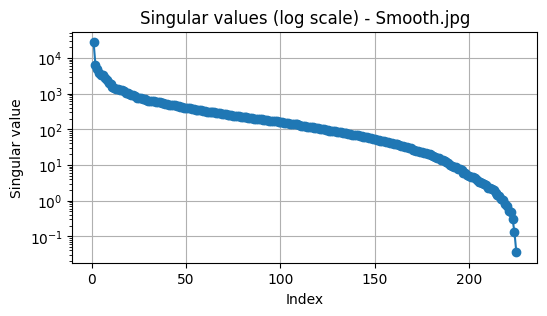

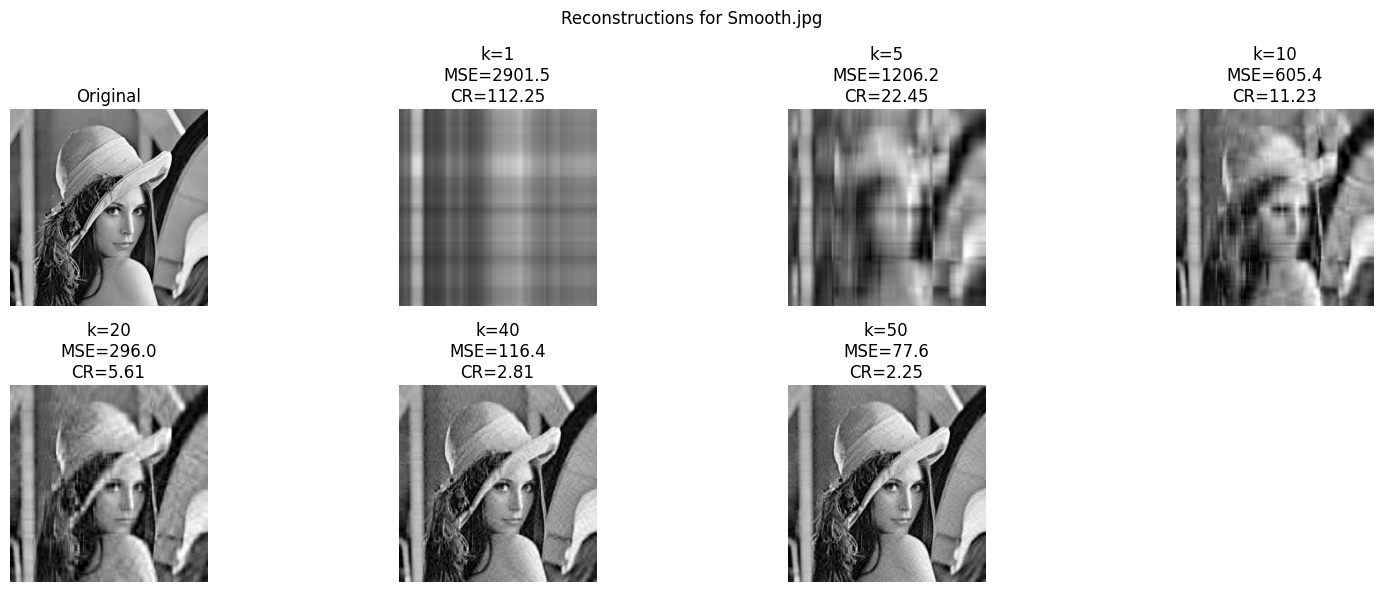

k	MSE	CompressionRatio
1	2901.482	112.251
5	1206.214	22.450
10	605.408	11.225
20	295.959	5.613
40	116.356	2.806
50	77.626	2.245

Image: Edge-dominant.png (path=c:\Users\acer\Desktop\U23AI118\SEM 5\DS-Lab\lab6-7\Edge-dominant.png, shape=348x330)


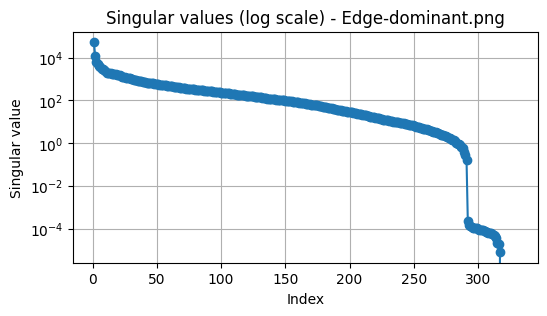

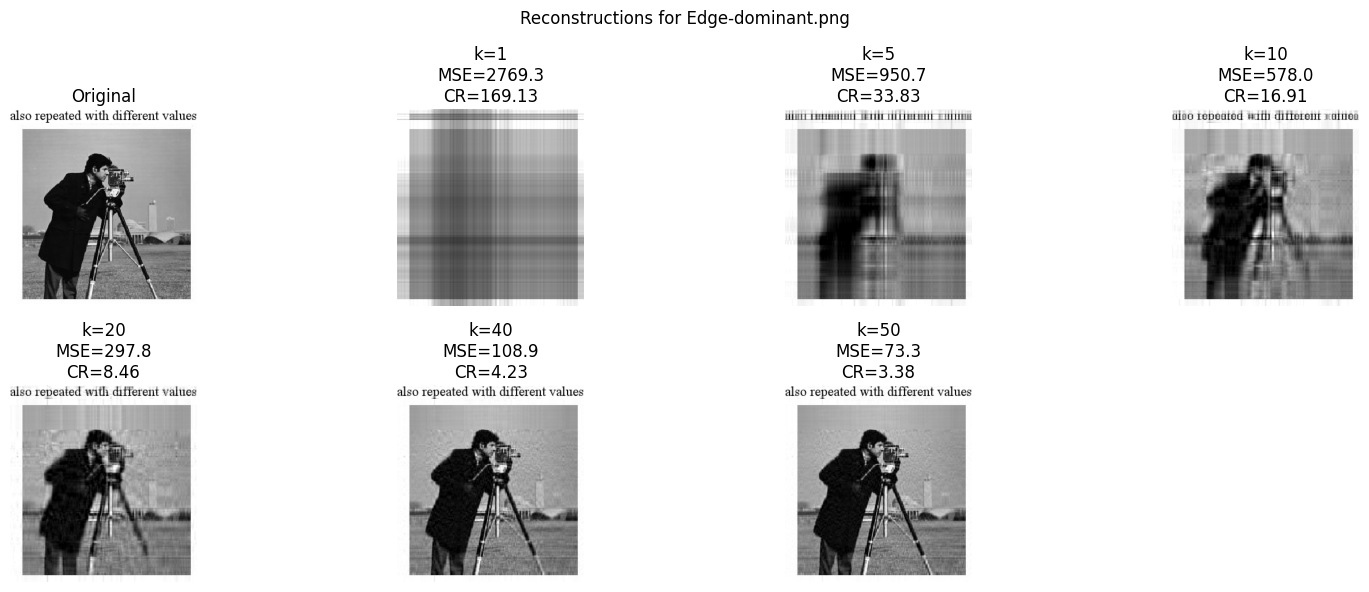

k	MSE	CompressionRatio
1	2769.340	169.131
5	950.672	33.826
10	578.020	16.913
20	297.816	8.457
40	108.949	4.228
50	73.275	3.383

Image: Textured.png (path=c:\Users\acer\Desktop\U23AI118\SEM 5\DS-Lab\lab6-7\Textured.png, shape=642x640)


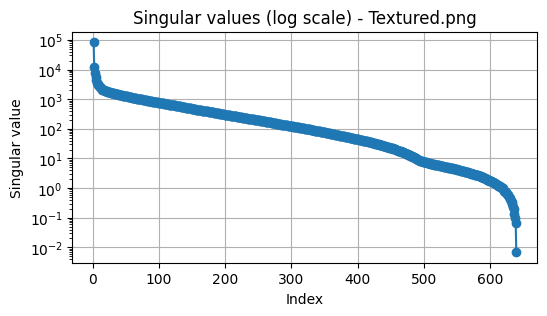

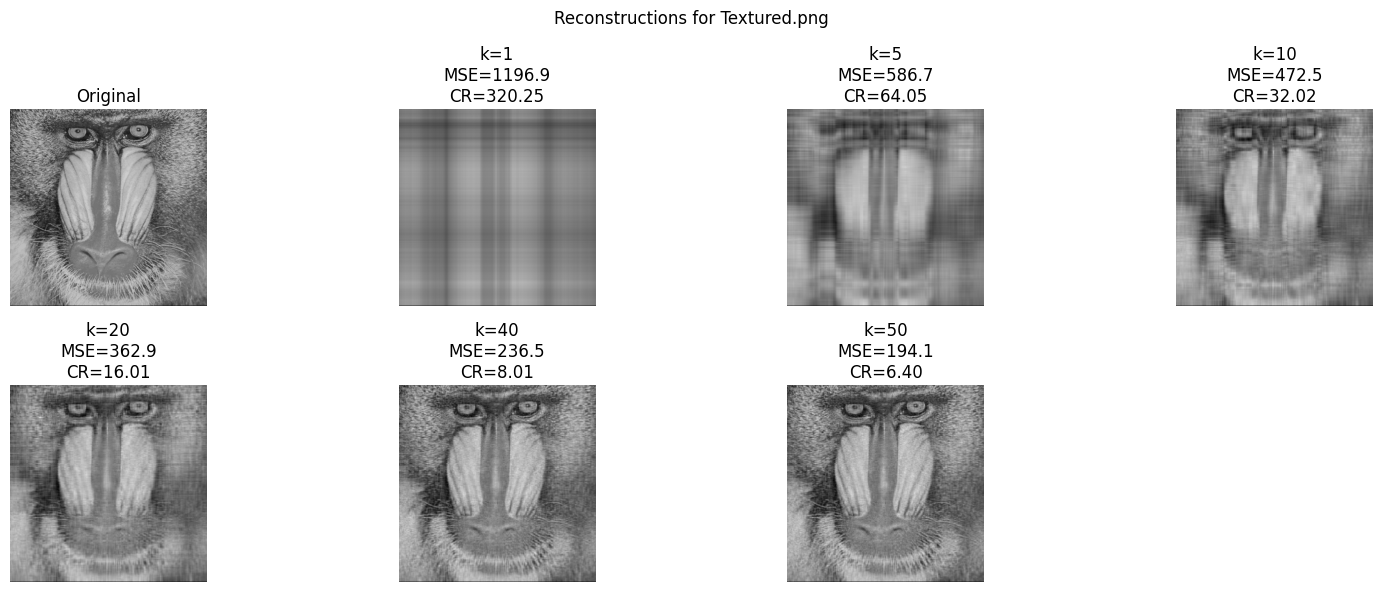

k	MSE	CompressionRatio
1	1196.859	320.249
5	586.681	64.050
10	472.503	32.025
20	362.871	16.012
40	236.548	8.006
50	194.069	6.405
SVD on 3 images completed.


In [13]:
image_files = ["Smooth.jpg", "Edge-dominant.png", "Textured.png"]
ks = [1, 5, 10, 20, 40, 50]

# find the files anywhere under the current workspace
cwd = Path.cwd()
found_paths = {}
for fname in image_files:
    matches = list(cwd.rglob(fname))
    if matches:
        found_paths[fname] = matches[0]
    else:
        found_paths[fname] = None

results = {}

for fname in image_files:
    path = found_paths[fname]
    if path is None:
        print(f"Warning: {fname} not found in workspace. Skipping.")
        continue

    A = load_grayscale(path)    # Converted into grayscale with defined function
    m, n = A.shape
    print(f"\nImage: {fname} (path={path}, shape={m}x{n})")

    U, S, Vt = svd(A)   # Using defined function computed 3 decomposed matrices

    # singular values plot for visualization purpose
    plt.figure(figsize=(6,3))
    plt.semilogy(np.arange(1, S.size+1), S, marker='o')
    plt.title(f"Singular values (log scale) - {fname}")
    plt.xlabel('Index')
    plt.ylabel('Singular value')
    plt.grid(True)
    plt.show()

    reconstructions = []
    summary = []
    for k in ks:
        k_effective = min(k, S.size)
        A_k = reconstruct_from_svd(U, S, Vt, k_effective)
        A_k_clipped = np.clip(A_k, 0, 255)  #Converts all value in the range of [0,255] for plotting grayscale image
        mse = np.mean((A - A_k_clipped)**2)
        cr = compression_ratio(m, n, k_effective)
        reconstructions.append((k_effective, A_k_clipped))
        summary.append((k_effective, mse, cr))

    # show original + reconstructions in a grid
    cols = 4
    rows = int(np.ceil((len(reconstructions)+1) / cols))
    plt.figure(figsize=(4*cols, 3*rows))

    plt.subplot(rows, cols, 1)
    plt.imshow(A, cmap='gray', vmin=0, vmax=255)
    plt.title('Original')
    plt.axis('off')

    for i, (k_eff, recon) in enumerate(reconstructions, start=2):
        plt.subplot(rows, cols, i)
        plt.imshow(recon, cmap='gray', vmin=0, vmax=255)
        mse = next(s for (kk, s, _c) in summary if kk == k_eff)
        cr = next(c for (kk, _s, c) in summary if kk == k_eff)
        plt.title(f'k={k_eff}\nMSE={mse:.1f}\nCR={cr:.2f}')
        plt.axis('off')

    plt.suptitle(f'Reconstructions for {fname}')
    plt.tight_layout()
    plt.show()

    # print table summary
    print("k\tMSE\tCompressionRatio")
    for k_eff, mse, cr in summary:
        print(f"{k_eff}\t{mse:.3f}\t{cr:.3f}")

    results[fname] = {
        'shape': (m,n),
        'S': S,
        'reconstructions': reconstructions,
        'summary': summary,
    }

print('SVD on 3 images completed.')

# Task 2 : Compare SVD and PCA
Used cats and dogs dataset to compare SVD and PCA

Loaded dataset: 400 images, resized to 128x128 (16384 pixels)
Computing covariance matrix on standardized training data...
Covariance matrix shape: (16384, 16384)
Covariance matrix shape: (16384, 16384)
Top 10 eigenvalues: [3334.08139399 1966.24725532 1447.86698176  935.99824721  567.77321197
  511.03388994  402.40682074  330.07490078  303.55628327  270.23044483]
Top 10 eigenvalues: [3334.08139399 1966.24725532 1447.86698176  935.99824721  567.77321197
  511.03388994  402.40682074  330.07490078  303.55628327  270.23044483]


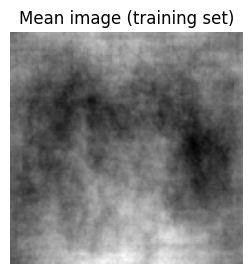

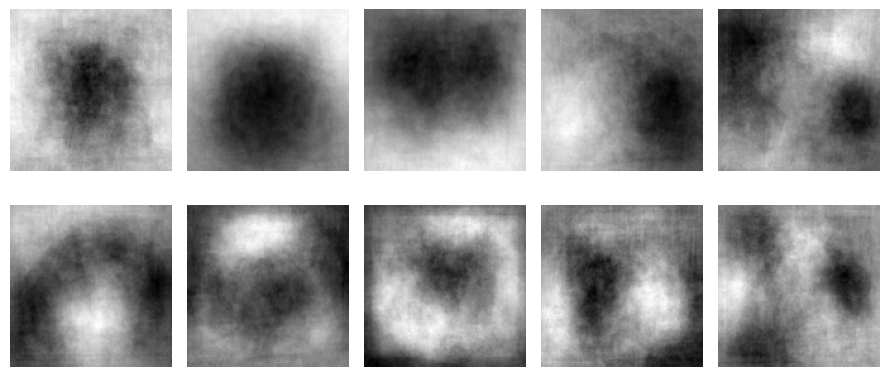


Average MSE across samples:
k	MSE_PCA	MSE_SVD
1	4225.668	2263.048
5	2554.328	510.338
10	1948.434	215.381
20	1668.327	72.059
40	1324.788	15.068
50	1247.682	7.413


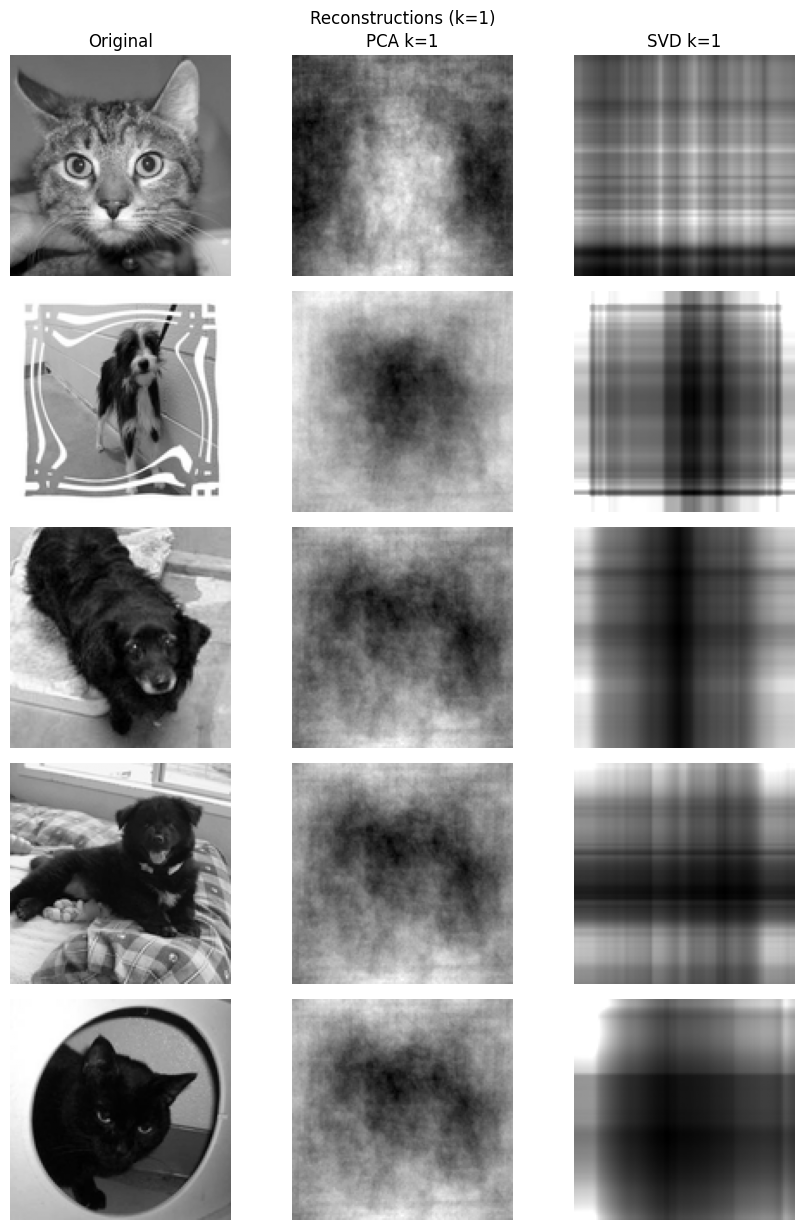

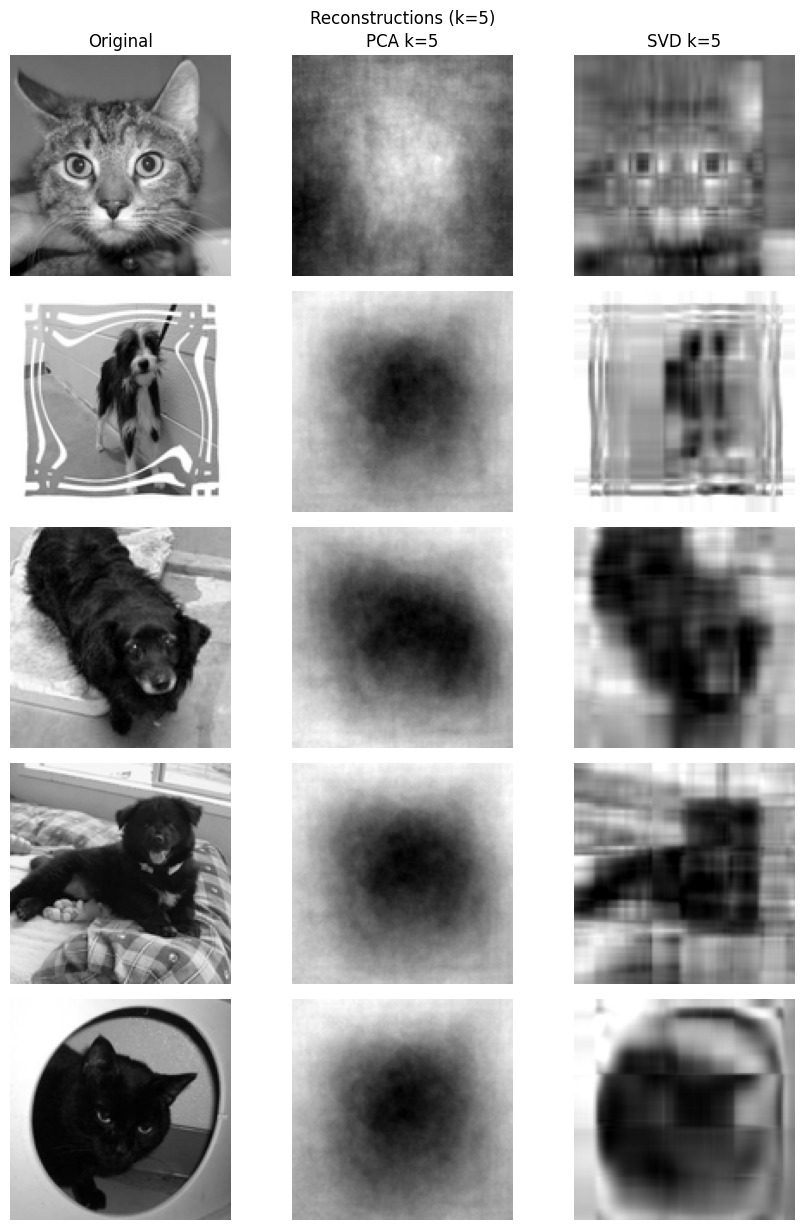

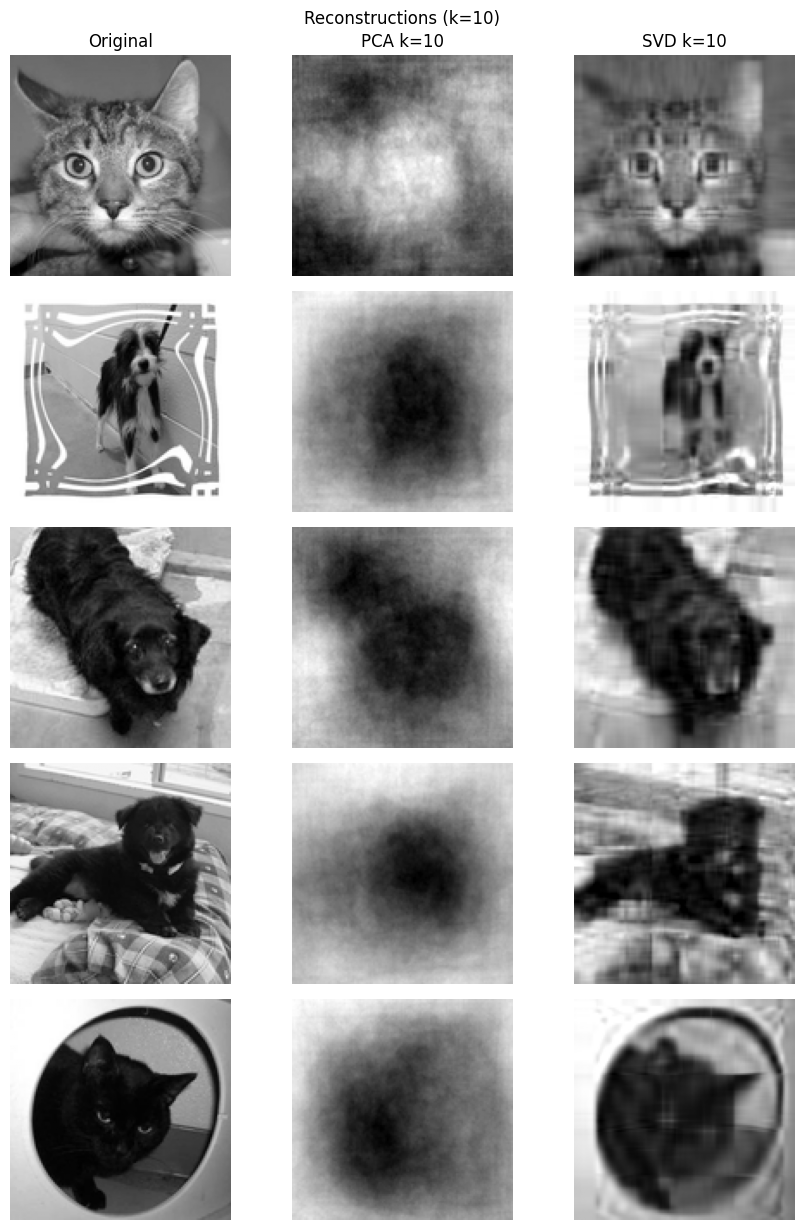

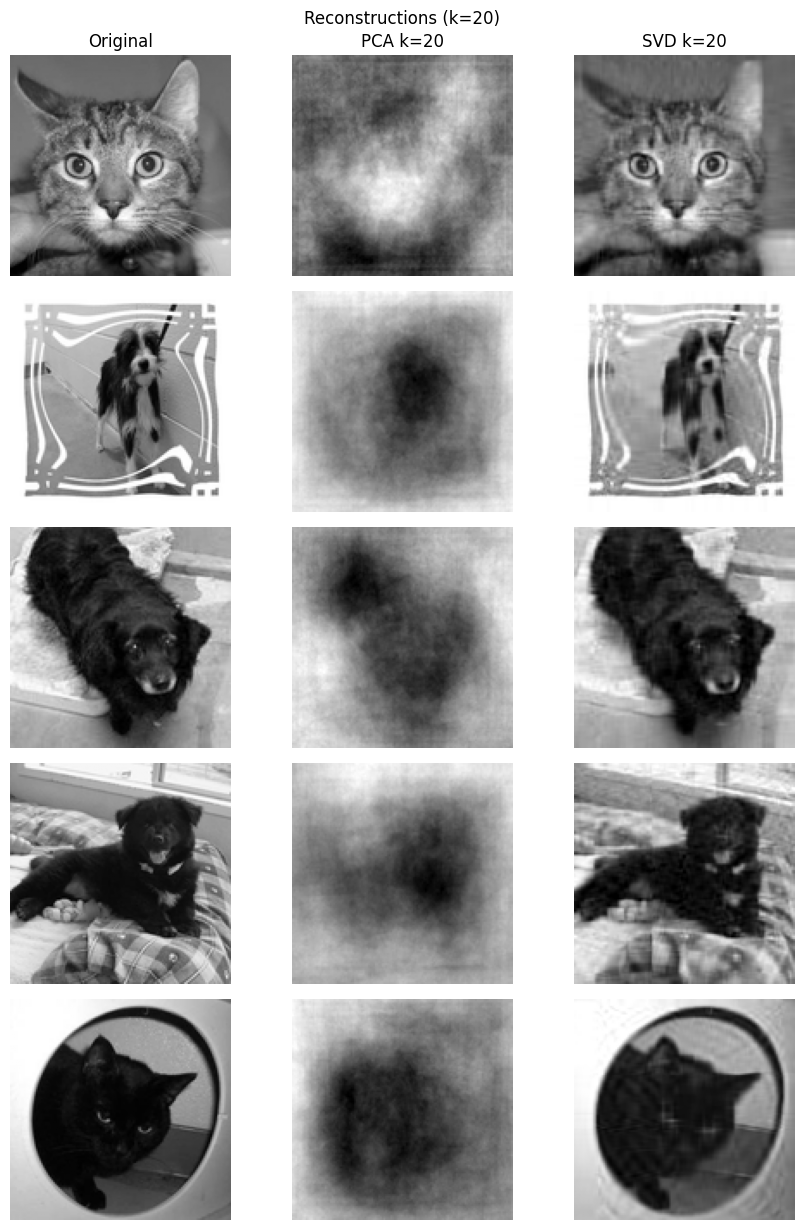

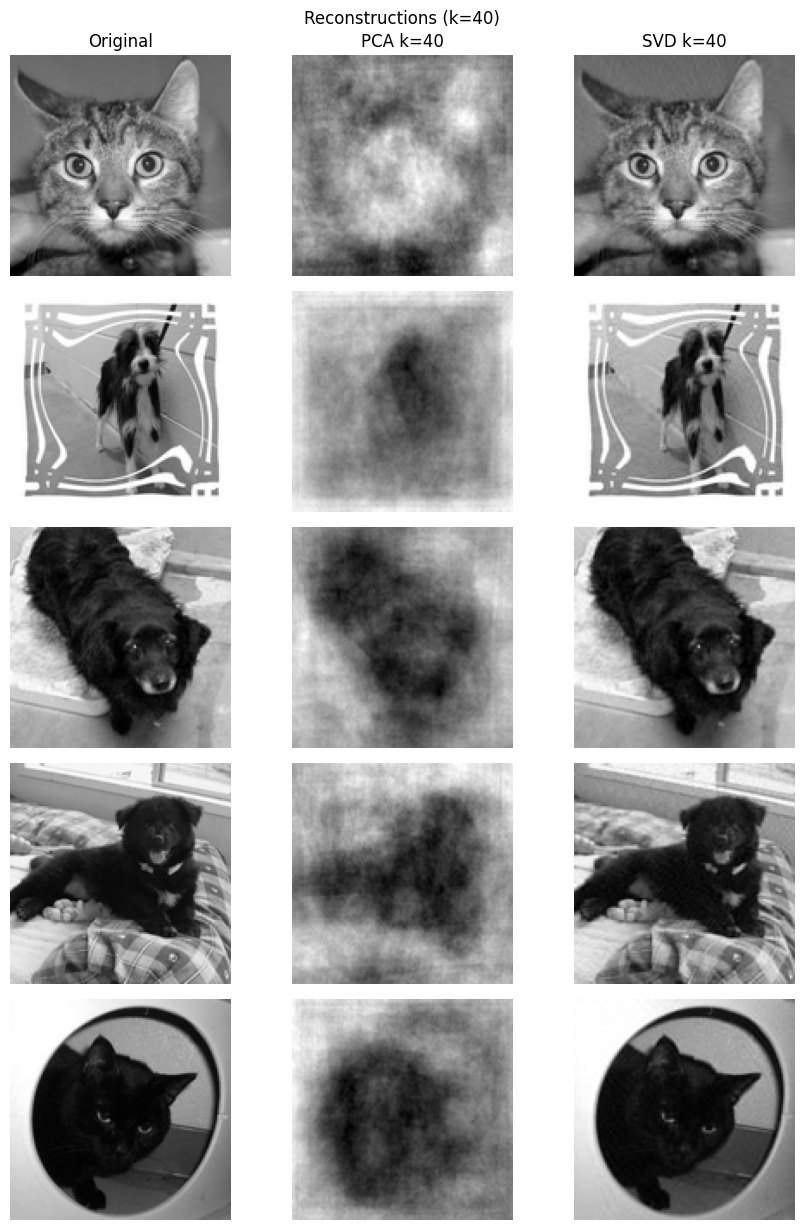

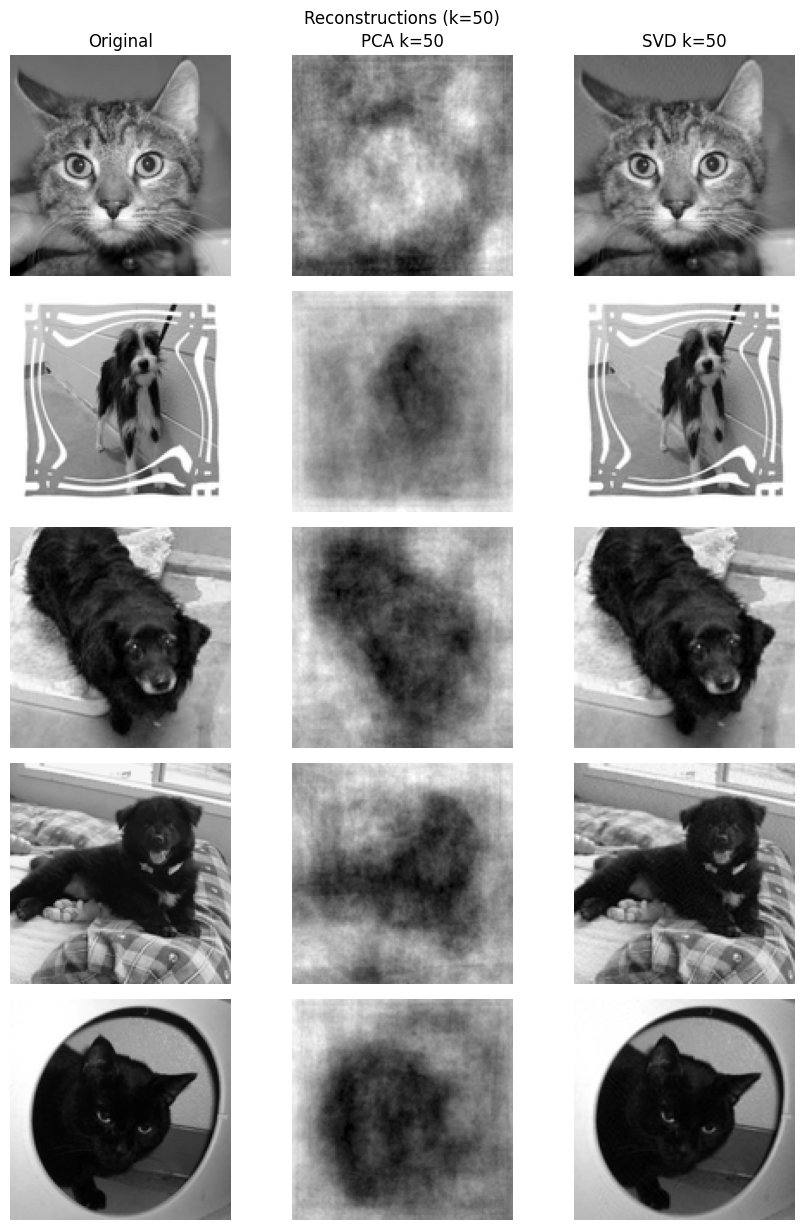


PCA vs SVD comparison complete.


In [14]:
candidates = [p for p in cwd.rglob('test') if p.is_dir() and p.parent.name == 'lab6-7']
if candidates:
    test_dir = candidates[0]
else:
    # fallback to the relative path
    test_dir = Path('lab6-7') / 'test'

if not test_dir.exists():
    print(f"Directory {test_dir} not found. Please ensure the dataset is present.")
    files = []
else:
    # accept common image formats
    exts = ('.jpg', '.jpeg', '.png', '.pgm', '.bmp')
    files = sorted([p for p in test_dir.iterdir() if p.suffix.lower() in exts])
    if len(files) == 0:
        print(f"No images with extensions {exts} found under {test_dir}.")

images = []
labels = []
img_shape = None
# we'll resize all images to this fixed shape (grayscale) for PCA/SVD
target_size = (128, 128)  # (height, width)
for p in files:
    try:
        img = Image.open(p).convert('L')
        img = img.resize((target_size[1], target_size[0]), Image.LANCZOS)
        arr = np.asarray(img, dtype=np.float64)
    except Exception as e:
        print('Failed to read', p, e)
        continue
    if img_shape is None:
        img_shape = arr.shape
    elif arr.shape != img_shape:
        # should not happen because we resized, but keep guard
        print('Skipping image with different shape:', p)
        continue
    images.append(arr.flatten())
    labels.append(p.stem)

if len(images) == 0:
    print('No images loaded; aborting PCA comparison.')
else:
    X = np.vstack(images)  # (n_samples, n_pixels)
    n_samples, n_pixels = X.shape
    img_h, img_w = img_shape
    print(f'Loaded dataset: {n_samples} images, resized to {img_h}x{img_w} ({n_pixels} pixels)')

    # split train/test (80/20)
    rng = np.random.default_rng(1)
    perm = rng.permutation(n_samples)
    n_train = int(0.8 * n_samples)
    train_idx = perm[:n_train]
    test_idx = perm[n_train:]
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = [labels[i] for i in train_idx]
    y_test = [labels[i] for i in test_idx]

    class SimpleStandardScaler:
        def __init__(self, with_mean=True, with_std=True):
            self.with_mean = with_mean
            self.with_std = with_std
            self.mean_ = None
            self.scale_ = None

        def fit(self, X):
            if self.with_mean:
                self.mean_ = np.mean(X, axis=0)
            else:
                self.mean_ = np.zeros(X.shape[1], dtype=X.dtype)
            if self.with_std:
                self.scale_ = np.std(X, axis=0, ddof=0)
                zero_mask = (self.scale_ == 0)
                if np.any(zero_mask):
                    self.scale_[zero_mask] = 1.0
            else:
                self.scale_ = np.ones(X.shape[1], dtype=X.dtype)
            return self

        def transform(self, X):
            return (X - self.mean_) / self.scale_

        def fit_transform(self, X):
            return self.fit(X).transform(X)

        def inverse_transform(self, X_std):
            return (X_std * self.scale_) + self.mean_

    scaler = SimpleStandardScaler(with_mean=True, with_std=True)
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    # --- PCA via covariance eigen-decomposition --------------------------
    print('Computing covariance matrix on standardized training data...')
    cov = np.cov(X_train_std, rowvar=False)
    print('Covariance matrix shape:', cov.shape)
    eigvals, eigvecs = np.linalg.eigh(cov)
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    print('Top 10 eigenvalues:', eigvals[:10])

    def top_k_components(k):
        return eigvecs[:, :k], eigvals[:k]

    def reconstruct_pca(X_std, evecs_k, scaler):
        weights = X_std.dot(evecs_k)
        X_rec_std = weights.dot(evecs_k.T)
        X_rec = scaler.inverse_transform(X_rec_std)
        return X_rec

    # helper to show images
    def show_images(images, titles=None, h=img_h, w=img_w, cmap='gray', ncols=5):
        n = len(images)
        ncols_local = ncols
        nrows = (n + ncols_local - 1) // ncols_local
        fig, axes = plt.subplots(nrows, ncols_local, figsize=(1.8*ncols_local,2.2*nrows))
        axes = np.array(axes).reshape(-1)
        for ax in axes:
            ax.axis('off')
        for i, img in enumerate(images):
            axes[i].imshow(img.reshape((h,w)), cmap=cmap)
            if titles is not None:
                axes[i].set_title(titles[i], fontsize=8)
        plt.tight_layout()
        plt.show()

    # show mean image
    mean_img = X_train.mean(axis=0)
    plt.figure(figsize=(3,4))
    plt.imshow(mean_img.reshape((img_h,img_w)), cmap='gray')
    plt.title('Mean image (training set)')
    plt.axis('off')
    plt.show()

    # Visualize first 10 eigenimages
    k_show = 10
    evecs10, _ = top_k_components(k_show)
    eigen_images = []
    for i in range(k_show):
        img = evecs10[:, i]
        img = (img - img.min()) / (img.max()-img.min()) * 255.0
        eigen_images.append(img)
    show_images(eigen_images, h=img_h, w=img_w, ncols=5)

    # --- Compare PCA reconstructions with per-image SVD reconstructions ---
    ks = [1, 5, 10, 20, 40, 50]
    sample_count = min(5, len(X_test))
    rng = np.random.default_rng(2)
    sample_idxs = rng.choice(len(X_test), size=sample_count, replace=False)
    originals = X_test[sample_idxs]

    # Precompute PCA reconstructions for each k
    pca_recons = {}
    for k in ks:
        evecs_k, _ = top_k_components(k)
        Xrec = reconstruct_pca(X_test_std[sample_idxs], evecs_k, scaler)
        pca_recons[k] = Xrec

    # Compute SVD reconstructions per sample per k and compare MSEs
    results = {}
    for k in ks:
        mse_pca = []
        mse_svd = []
        for i, sidx in enumerate(sample_idxs):
            orig = originals[i]
            # PCA reconstruct
            p_rec = pca_recons[k][i]
            p_rec = np.clip(p_rec, 0, 255)
            mse_pca.append(np.mean((orig - p_rec)**2))
            # SVD reconstruct: reshape original to image, do SVD on 2D
            A_img = orig.reshape((img_h, img_w))
            U, S, Vt = svd(A_img)
            Arec = reconstruct_from_svd(U, S, Vt, k)
            Arec = np.clip(Arec, 0, 255).reshape(-1)
            mse_svd.append(np.mean((orig - Arec)**2))
        results[k] = (np.mean(mse_pca), np.mean(mse_svd))

    # Print table of average MSE across selected test samples
    print('\nAverage MSE across samples:')
    print('k\tMSE_PCA\tMSE_SVD')
    for k in ks:
        m_p, m_s = results[k]
        print(f"{k}\t{m_p:.3f}\t{m_s:.3f}")

    # Visualize reconstructions: for each k show a figure with rows = samples and 3 cols: original, PCA_k, SVD_k
    for k in ks:
        cols = 3
        rows = sample_count
        plt.figure(figsize=(3*cols, 2.5*rows))
        for i in range(rows):
            orig = originals[i]
            p_rec = pca_recons[k][i]
            # SVD rec
            A_img = orig.reshape((img_h, img_w))
            U, S, Vt = svd(A_img)
            Arec = reconstruct_from_svd(U, S, Vt, k)
            Arec = np.clip(Arec, 0, 255)

            plt.subplot(rows, cols, i*cols + 1)
            plt.imshow(orig.reshape((img_h,img_w)), cmap='gray')
            if i == 0:
                plt.title('Original')
            plt.axis('off')

            plt.subplot(rows, cols, i*cols + 2)
            plt.imshow(p_rec.reshape((img_h,img_w)), cmap='gray')
            if i == 0:
                plt.title(f'PCA k={k}')
            plt.axis('off')

            plt.subplot(rows, cols, i*cols + 3)
            plt.imshow(Arec, cmap='gray')
            if i == 0:
                plt.title(f'SVD k={k}')
            plt.axis('off')
        plt.suptitle(f'Reconstructions (k={k})')
        plt.tight_layout()
        plt.show()

    print('\nPCA vs SVD comparison complete.')


## Observations
We can see clearly SVD performed better than PCA
SVD was able to give approximates with K = 20 and gave almost clarity with K = 40

## Conclusion
We saw SVD is much better than PCA.